In [39]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Number of classes to access, in this case 2 to be able to train it on both what is, and what isn't northern lights 
num_classes = 2
# Load resnet50 without top layer
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

northern_light_classifier_model = Sequential()
northern_light_classifier_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
northern_light_classifier_model.add(Dense(num_classes, activation='softmax'))

northern_light_classifier_model.layers[0].trainable = False

northern_light_classifier_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224

# Specify the values for all arguments to data_generator_with_aug.
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                              horizontal_flip = True,
                                              width_shift_range = 0.1,
                                              height_shift_range = 0.1)
            
data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

In [40]:
# Specify which type of ImageDataGenerator above is to load in training data
train_generator = data_generator_with_aug.flow_from_directory(
        directory = '../input/nordlys/train (2)/train',
        target_size=(image_size, image_size),
        batch_size=20,
        class_mode='categorical')

# Specify which type of ImageDataGenerator above is to load in validation data
validation_generator = data_generator_no_aug.flow_from_directory(
        directory = '../input/nordlys/val/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

northern_light_classifier_model.fit_generator(
        train_generator,
        epochs = 5,
        steps_per_epoch=22,
        validation_data=validation_generator)

Found 445 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
22/22 [==============================] - 38s 2s/step - loss: 0.2152 - accuracy: 0.9059 - val_loss: 0.2988 - val_accuracy: 0.8750
Epoch 2/5
22/22 [==============================] - 39s 2s/step - loss: 0.0701 - accuracy: 0.9835 - val_loss: 0.3127 - val_accuracy: 0.8250
Epoch 3/5
22/22 [==============================] - 39s 2s/step - loss: 0.0500 - accuracy: 0.9906 - val_loss: 0.2260 - val_accuracy: 0.9250
Epoch 4/5
22/22 [==============================] - 47s 2s/step - loss: 0.0391 - accuracy: 0.9929 - val_loss: 0.2373 - val_accuracy: 0.9250
Epoch 5/5
22/22 [==============================] - 37s 2s/step - loss: 0.0291 - accuracy: 0.9953 - val_loss: 0.1890 - val_accuracy: 0.9250


In [41]:
from os import walk
from os.path import join
from IPython.display import Image, display

# Lists of all complete and all relative paths to validation images
paths = []
list_of_files = []

for root, dirs, files in walk('../input/nordlys/val/val/nordlys'):
    for file in files:
        paths.append(join('../input/nordlys/val/val/nordlys',file))
        list_of_files.append(file)

for root, dirs, files in walk('../input/nordlys/val/val/ikkenordlys'):
    for file in files:
        paths.append(join('../input/nordlys/val/val/ikkenordlys',file))
        list_of_files.append(file)


In [42]:
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)


In [43]:
preds = northern_light_classifier_model.predict(read_and_prep_images(paths))

In [44]:
# value for index 0 indicates not northern light, while value at index 1 indicate northern light
print(preds)

[[2.61641154e-03 9.97383535e-01]
 [2.29027541e-03 9.97709751e-01]
 [2.62811389e-02 9.73718822e-01]
 [1.51671525e-02 9.84832823e-01]
 [3.42185907e-02 9.65781391e-01]
 [6.16650912e-04 9.99383330e-01]
 [2.96963588e-03 9.97030377e-01]
 [3.38706151e-02 9.66129422e-01]
 [9.79145872e-04 9.99020815e-01]
 [2.21551910e-01 7.78448105e-01]
 [5.09177393e-04 9.99490857e-01]
 [5.42171067e-03 9.94578242e-01]
 [4.88810008e-03 9.95111883e-01]
 [2.92856619e-02 9.70714271e-01]
 [1.13872755e-02 9.88612711e-01]
 [1.66646671e-02 9.83335376e-01]
 [4.20688130e-02 9.57931161e-01]
 [2.00374782e-01 7.99625278e-01]
 [5.96371554e-02 9.40362811e-01]
 [7.52627617e-03 9.92473722e-01]
 [7.42688060e-01 2.57311970e-01]
 [9.78888810e-01 2.11112015e-02]
 [8.43059719e-01 1.56940296e-01]
 [9.96189415e-01 3.81057500e-03]
 [9.99656677e-01 3.43264954e-04]
 [9.89309669e-01 1.06903743e-02]
 [9.91617739e-01 8.38225242e-03]
 [9.88754272e-01 1.12457005e-02]
 [9.47283983e-01 5.27160205e-02]
 [9.60991383e-01 3.90085801e-02]
 [9.973263

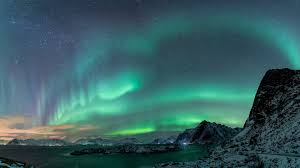

13.jpg [0.00261641 0.99738353] 0


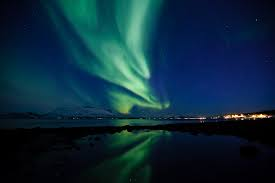

12.jpg [0.00229028 0.99770975] 1


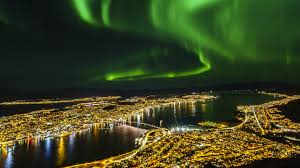

2.jpg [0.02628114 0.9737188 ] 2


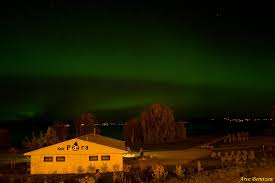

10.jpg [0.01516715 0.9848328 ] 3


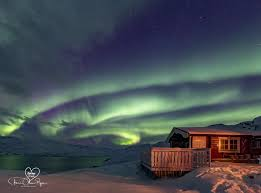

9.jpg [0.03421859 0.9657814 ] 4


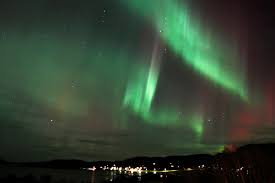

18.jpg [6.1665091e-04 9.9938333e-01] 5


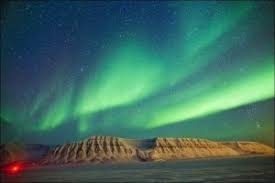

11.jpg [0.00296964 0.9970304 ] 6


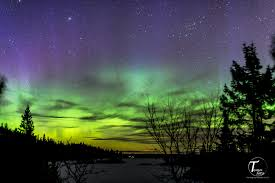

20.jpg [0.03387062 0.9661294 ] 7


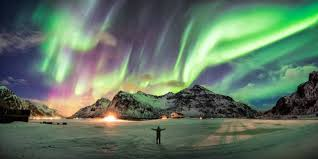

1.jpg [9.791459e-04 9.990208e-01] 8


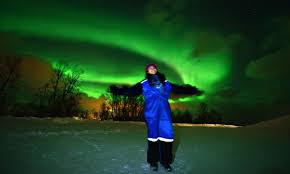

15.jpg [0.22155191 0.7784481 ] 9


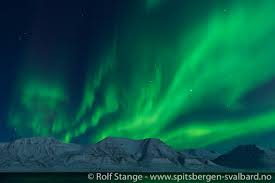

17.jpg [5.0917739e-04 9.9949086e-01] 10


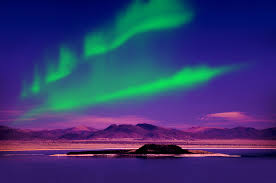

3.jpg [0.00542171 0.99457824] 11


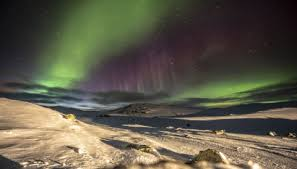

8.jpg [0.0048881 0.9951119] 12


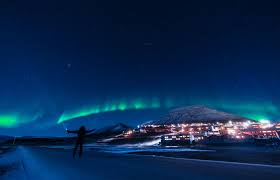

7.jpg [0.02928566 0.9707143 ] 13


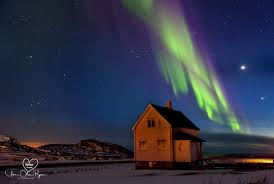

14.jpg [0.01138728 0.9886127 ] 14


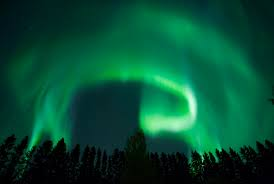

4.jpg [0.01666467 0.9833354 ] 15


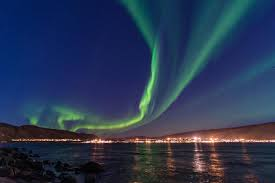

19.jpg [0.04206881 0.95793116] 16


5.jpg [0.20037478 0.7996253 ] 17


6.jpg [0.05963716 0.9403628 ] 18


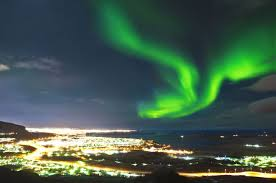

16.jpg [0.00752628 0.9924737 ] 19


FileNotFoundError: [Errno 2] No such file or directory: '/ikkenord/13.jpg'

In [46]:
import shutil
for i,prediction in enumerate(preds):
    shutil.copy(paths[i], list_of_files[i])        
    display(Image(paths[i]))
    print(list_of_files[i],prediction,i)